# Задача OneMax

**Функция приспособенности**

в нашем случае - $\sum{individ}$

**Имитация эволюционного процесса:**

1. Отбор наиболее приспособленных: 
   
   Цель - оставить в популяции наиболее приспособленных, но сохранить популяционное разнообразие.
   
   Турнирный отбор - отбор случайным образом несколько индиивидумов и среди отобранных - отбирается лучший
   
   Есть другие способы отбора
   
2. Crossing (Скрещивание) родителей для получения новых индивидуумов

   Из пар родителей выбирают фрагменты хромосом и их перемешивают
   
   Одноточечное скрещивание - случайным образом выбирается точка разреза хромосом у родителей, 
   затем осуществляется обмен их частей. Так появляется два потомка. Тогда размер популяции не менятеся.
   
3. Мутация - случайное изменение отдельных генов.
   
   С малой вероятностью меняется (инвертируется) гены.

In [1]:
import random
import matplotlib.pyplot as plt
 
# константы задачи
ONE_MAX_LENGTH = 100    # длина подлежащей оптимизации битовой строки
 
# константы генетического алгоритма
POPULATION_SIZE = 200   # количество индивидуумов в популяции
P_CROSSOVER = 0.9       # вероятность скрещивания
P_MUTATION = 0.1        # вероятность мутации индивидуума
MAX_GENERATIONS = 50    # максимальное количество поколений

RANDOM_SEED = 42
random.seed(RANDOM_SEED)

In [2]:
class FitnessMax():
    def __init__(self):
        self.values = [0]
 
 
class Individual(list):
    def __init__(self, *args):
        super().__init__(*args)
        self.fitness = FitnessMax()
        
def oneMaxFitness(individual):
    return sum(individual), # кортеж

def individualCreator():
    return Individual([random.randint(0, 1) for i in range(ONE_MAX_LENGTH)])
 
def populationCreator(n = 0):
    return list([individualCreator() for i in range(n)])

In [3]:
population = populationCreator(n=POPULATION_SIZE) 
generationCounter = 0

In [4]:
fitnessValues = list(map(oneMaxFitness, population))
 
for individual, fitnessValue in zip(population, fitnessValues):
    individual.fitness.values = fitnessValue
    
maxFitnessValues = []
meanFitnessValues = []

def clone(value):
    ind = Individual(value[:])
    ind.fitness.values[0] = value.fitness.values[0]
    return ind

def selTournament(population, p_len):
    offspring = []
    for n in range(p_len):
        i1 = i2 = i3 = 0
        while i1 == i2 or i1 == i3 or i2 == i3:
            i1, i2, i3 = random.randint(0, p_len-1), random.randint(0, p_len-1), random.randint(0, p_len-1)
 
        offspring.append(max([population[i1], population[i2], population[i3]], key=lambda ind: ind.fitness.values[0]))
 
    return offspring

def cxOnePoint(child1, child2):
    s = random.randint(2, len(child1)-3)
    child1[s:], child2[s:] = child2[s:], child1[s:]
 
 
def mutFlipBit(mutant, indpb=0.01):
    for indx in range(len(mutant)):
        if random.random() < indpb:
            mutant[indx] = 0 if mutant[indx] == 1 else 1

In [5]:
fitnessValues = [individual.fitness.values[0] for individual in population]

In [6]:
# max(fitnessValues) < ONE_MAX_LENGTH and
while  generationCounter < MAX_GENERATIONS:
    generationCounter += 1
    offspring = selTournament(population, len(population))
    offspring = list(map(clone, offspring))
 
    for child1, child2 in zip(offspring[::2], offspring[1::2]):
        if random.random() < P_CROSSOVER:
            cxOnePoint(child1, child2)
 
    for mutant in offspring:
        if random.random() < P_MUTATION:
            mutFlipBit(mutant, indpb=1.0/ONE_MAX_LENGTH)
 
    freshFitnessValues = list(map(oneMaxFitness, offspring))
    for individual, fitnessValue in zip(offspring, freshFitnessValues):
        individual.fitness.values = fitnessValue
 
    population[:] = offspring
 
    fitnessValues = [ind.fitness.values[0] for ind in population]
 
    maxFitness = max(fitnessValues)
    meanFitness = sum(fitnessValues) / len(population)
    maxFitnessValues.append(maxFitness)
    meanFitnessValues.append(meanFitness)
    print(f"Поколение {generationCounter}: Макс приспособ. = {maxFitness}, Средняя приспособ.= {meanFitness}")
 
    best_index = fitnessValues.index(max(fitnessValues))
    print("Лучший индивидуум = ", *population[best_index], "\n")

Поколение 1: Макс приспособ. = 63, Средняя приспособ.= 53.53
Лучший индивидуум =  1 1 1 0 1 1 1 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0 1 1 1 1 1 1 0 1 0 0 1 1 0 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 0 0 0 1 0 1 1 0 1 1 1 0 1 0 1 0 0 1 1 1 1 1 1 1 0 0 0 0 1 1 0 1 1 

Поколение 2: Макс приспособ. = 66, Средняя приспособ.= 56.625
Лучший индивидуум =  1 0 0 1 0 1 1 0 1 0 0 1 1 1 0 1 1 0 0 0 1 0 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 0 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0 0 1 1 0 0 0 1 

Поколение 3: Макс приспособ. = 67, Средняя приспособ.= 59.245
Лучший индивидуум =  0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 0 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0 0 1 1 1 0 1 1 

Поколение 4: Макс приспособ. = 70, Средняя приспособ.= 61.97
Лучший индивидуум =  1 1 1 1 1 1 1 1 0 1 0 0 1 0 0 1 1 1 1 0 1 0 1 1 0 0 1 1 1 1 1 1 

Лучший индивидуум =  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

Поколение 35: Макс приспособ. = 100, Средняя приспособ.= 98.43
Лучший индивидуум =  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

Поколение 36: Макс приспособ. = 100, Средняя приспособ.= 98.865
Лучший индивидуум =  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

Поколение 37: Макс приспособ. = 100, Средняя приспособ.= 99.2
Лучший индивидуум =  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

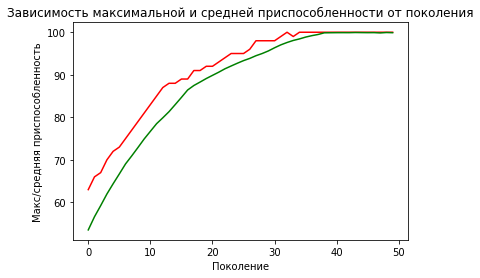

In [7]:
plt.plot(maxFitnessValues, color='red')
plt.plot(meanFitnessValues, color='green')
plt.xlabel('Поколение')
plt.ylabel('Макс/средняя приспособленность')
plt.title('Зависимость максимальной и средней приспособленности от поколения')
plt.show()

In [8]:
!pip install deap

gen	nevals	max	avg  
0  	50    	60 	50.44
1  	46    	62 	53.7 
2  	48    	62 	56.68
3  	47    	65 	59.66
4  	49    	68 	61.58
5  	45    	71 	63.5 
6  	47    	70 	65.62
7  	48    	73 	68   
8  	46    	75 	70   
9  	50    	75 	70.92
10 	40    	76 	72   
11 	45    	77 	72.98
12 	42    	78 	74.14
13 	44    	80 	75.26
14 	48    	82 	77.52
15 	47    	82 	79.46
16 	42    	83 	80.64
17 	42    	83 	81.62
18 	48    	84 	81.96
19 	47    	86 	82.22
20 	46    	86 	82.84
21 	50    	86 	83.46
22 	50    	87 	84.12
23 	46    	87 	85.08
24 	44    	87 	85.74
25 	45    	88 	86.2 
26 	45    	88 	86.52
27 	44    	89 	86.88
28 	46    	90 	87.54
29 	42    	90 	88.44
30 	46    	90 	89   
31 	48    	91 	89.6 
32 	50    	93 	90.24
33 	43    	93 	90.9 
34 	46    	93 	91.76
35 	47    	93 	92.1 
36 	49    	94 	92.62
37 	48    	94 	92.86
38 	48    	94 	92.9 
39 	46    	94 	93.24
40 	45    	95 	93.54
41 	48    	95 	93.96
42 	49    	95 	94.26
43 	46    	95 	94.64
44 	50    	95 	94.74
45 	43    	95 	94.78
46 	49    	96

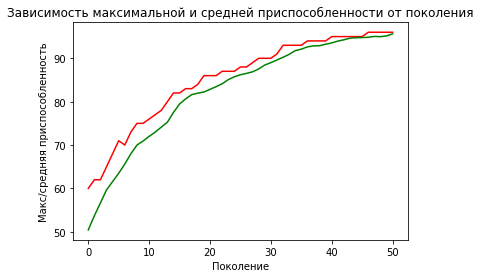

In [43]:
from deap import base
from deap import creator
from deap import tools

import numpy as np

# create(<название класса>, <базовый класс>, [атрибуты нового класса])

creator.create("FitnessMax", base.Fitness, weights=(1.0,))

creator.create("Individual", list, fitness=creator.FitnessMax)

def oneMaxFitness(individual): # оставим без изменения
    return sum(individual), # кортеж

toolbox = base.Toolbox()
toolbox.register("zeroOrOne", random.randint, 0, 1)

toolbox.register("individualCreator", tools.initRepeat, creator.Individual, toolbox.zeroOrOne, ONE_MAX_LENGTH)

toolbox.register("populationCreator", tools.initRepeat, list, toolbox.individualCreator)

population = toolbox.populationCreator(n=POPULATION_SIZE)

toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("mate", tools.cxOnePoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=1.0/ONE_MAX_LENGTH)

toolbox.register("evaluate", oneMaxFitness)

stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("max", np.max)
stats.register("avg", np.mean)

from deap import base, algorithms
population, logbook = algorithms.eaSimple(population, toolbox,
                                            cxpb = P_CROSSOVER,
                                            mutpb = P_MUTATION,
                                            ngen = MAX_GENERATIONS,
                                            stats = stats,
                                            verbose = True)

maxFitnessValues, meanFitnessValues = logbook.select("max", "avg")

plt.plot(maxFitnessValues, color = 'red')
plt.plot(meanFitnessValues, color = 'green')
plt.xlabel('Поколение')
plt.ylabel('Макс/средняя приспособленность')
plt.title('Зависимость максимальной и средней приспособленности от поколения')
plt.show()